In [317]:
from search_2 import *
import time
from agents import *
import numpy as np

N = 100

# First we code up the search agent
class VacuumSearch(Problem):
    def __init__(self, initial=(0,0), goal=None, dirt=[], **kwds):
        Problem.__init__(self, initial=initial, goal=goal, dirt=dirt, **kwds)
        self.dirt = dirt
        
    directions = [(-1, 0), (+1, 0), (0, +1), (0, -1)]

    def action_cost(self, s, action, s1):
        if s == s1:
            return -100
        return 1
    
    def is_goal(self, state):
        return self.dirt == []

    def result(self, state, action):
        return action
    
    def actions(self, state):
        if state in self.dirt:
            self.dirt.remove(state)
            S = {(state[0],state[1])}
            return S
        x, y = state
        S = {(x + dx, y + dy) for (dx, dy) in self.directions}
        Z = {x for x in S if x[0] in range(N) and x[1] in range(N)}
        return Z

class VacuumAgent(Agent):

    def __init__(self, program = None):
        super().__init__(program)
        self.location = [0, 0]
        self.direction = 'R' # 'R', 'L', 'U', 'D'

# The agent should have no knowledge of the dirt distribution.
# The environment has the dirt distribution. 
def program(percept):
    if percept:
        return ('Suck','None')
    else:
        bump = 'Bump' if agent.bump else 'None'
        return ('Move', bump)

class Environment:
    
    def __init__(self, dirt):
        self.agents = []
        self.dirt = dirt
        
    def percept(self, agent):
        loc = agent.location
        s = (loc[0], loc[1])
        return s in self.dirt

    def execute_action(self, agent, action):
        if action[0] == 'Suck':
            loc = agent.location
            s = (loc[0], loc[1])
            self.dirt.remove(s)
            agent.performance -= 100
        if action[0] == 'Move':
            agent.performance += 1
            if action[1] == 'Bump':
                agent.bump = False
            else:
                agent.direction = random.choice(['R', 'L', 'U', 'D'])
                agent.bump = self.move_agent(agent)

    def move_agent(self, agent):
        loc = agent.location
        if agent.direction == 'R':
            if loc[0] + 1 == N:
                agent.bump = True
            else:
                agent.location[0] += 1
        elif agent.direction == 'L':
            if loc[0] - 1 == -1:
                agent.bump = True
            else:
                agent.location[0] -= 1
        elif agent.direction == 'U':
            if loc[1] + 1 == N:
                agent.bump = True
            else:
                agent.location[1] += 1
        elif agent.direction == 'D':
            if loc[1] - 1 == -1:
                agent.bump = True
            else:
                agent.location[1] -= 1
        return agent.bump

    def step(self):
        action = agent.program(self.percept(agent))
        self.execute_action(self.agents[0], action)
        #print(self.agents[0].location, self.agents[0].bump, self.agents[0].direction)
        
    def run(self, steps=100000000):
        for step in range(steps): 
            if not self.dirt:
                print("\tall dirt found")
                break
            self.step()


    def add_agent(self, agent):
        self.agents.append(agent)


In [318]:
# We are going to compare the performace between 
# a search agent and a random reflex agent

k = int(0.2 * N)
dirt = [(x,y) for x in range(N) for y in range(N)]
dirt = random.sample(dirt, k=k)

v = VacuumSearch(dirt=dirt.copy())

# execution time
t0 = time.time()
u1 = uniform_cost_search(v)
t1 = time.time()
print("The search agent takes: ", t1-t0)
print("With path cost: ", u1.path_cost) 

env = Environment(dirt.copy())
agent = VacuumAgent(program)
env.add_agent(agent)

t0 = time.time()
env.run()
t1 = time.time()
print("The random reflex agent takes: ", t1-t0)
print("With path cost: ", agent.performance)

The search agent takes:  0.8268561363220215
With path cost:  -1399
	all dirt found
The random reflex agent takes:  0.44652366638183594
With path cost:  239009


In [323]:
# Time taken
T = [(5, 0.0005152, 0.000409),
     (10, 0.01320, 0.000814),
     (50, 0.36978, 0.052511),
     (100, 0.36709, 0.29217),
     (150, 2.041389, 1.267393),
     (200, 2.98996, 1.4945),
     (300, 9.1033, 4.1168),
     (400, 15.87725, 10.9956),
     (500, 26.3129, 19.18689),
     (600, 48.5008, 22.227),
     (700, 71.76588, 36.5527)]


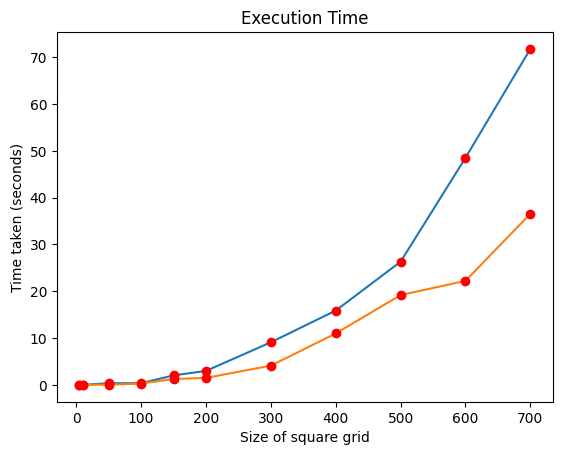

In [324]:
x_val = [x[0] for x in T]
y1_val = [x[1] for x in T]
y2_val = [x[2] for x in T]

plt.plot(x_val,y1_val)
plt.plot(x_val,y1_val,'or')

plt.plot(x_val,y2_val)
plt.plot(x_val,y2_val,'or')

plt.title("Execution Time")
plt.xlabel("Size of square grid")
plt.ylabel("Time taken (seconds)")

plt.show()

As we can see from the above graph, the time taken to obtain an optimum solution via graph search is quickly diverging from the time taken for a random reflex agent to obtain a solution. Hence, if execution time is important we might consider selecting a random reflex agent for the task. The reason for this is that the state space for the graph search has size $n^2 \cdot 2^n$.


If we are concerned with the path cost then we would have to select the search agent variant. For instance, if N = 100:

The search agent takes 0.8268561363220215 seconds, with path cost:  -1399.

The random reflex agent takes 0.4465236663818359 seconds, with path cost:  239009

That is, the path cost for the random agent is monumental. And it only gets worse from here on.